In [1]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
website_url = requests.get('https://www.basketball-reference.com/players/b/bealbr01/gamelog/2019')
soup = BeautifulSoup(website_url.content,'lxml')
soup.prettify()
My_table = soup.find('table',{'class':'row_summable sortable stats_table'})
tabledata = My_table.findAll('td')
data = []
for cell in tabledata:
    data.append(cell.get_text())

In [4]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))

In [15]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')
headers.remove('G')
headers.remove('Date')
headers.remove('Age')
headers.remove('Tm')
headers.remove('\xa0')
headers = ['G', 'Date', 'Age', 'Tm', 'HC'] + headers
print(headers)

['G', 'Date', 'Age', 'Tm', 'HC', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']


In [50]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)

In [51]:
df1 = df1.drop(['\xa0', 'Tm', 'Age', 'GS'], axis=1)
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2018-10-18,,MIA,27:11,7,16,.438,2,7,...,1,1,2,1,0,1,5,20,10.5,-6
1,2,2018-10-20,,TOR,35:14,12,21,.571,6,11,...,3,3,6,1,1,1,5,32,25.1,+3
2,3,2018-10-22,@,POR,43:05,10,25,.400,5,9,...,7,8,7,0,1,0,3,25,18.3,+7
3,4,2018-10-24,@,GSW,19:25,10,15,.667,1,4,...,3,3,4,1,0,0,3,23,20.0,-10
4,5,2018-10-26,@,SAC,39:01,6,19,.316,3,11,...,5,5,0,2,0,5,5,21,6.6,-7


In [52]:
df1['HC'] = df1['HC'].map({'@': 'Away', '': 'Home'})

In [53]:
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2018-10-18,Home,MIA,27:11,7,16,.438,2,7,...,1,1,2,1,0,1,5,20,10.5,-6
1,2,2018-10-20,Home,TOR,35:14,12,21,.571,6,11,...,3,3,6,1,1,1,5,32,25.1,+3
2,3,2018-10-22,Away,POR,43:05,10,25,.400,5,9,...,7,8,7,0,1,0,3,25,18.3,+7
3,4,2018-10-24,Away,GSW,19:25,10,15,.667,1,4,...,3,3,4,1,0,0,3,23,20.0,-10
4,5,2018-10-26,Away,SAC,39:01,6,19,.316,3,11,...,5,5,0,2,0,5,5,21,6.6,-7


In [54]:
df1.MP = df1.MP.str[:-3]
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2018-10-18,Home,MIA,27,7,16,.438,2,7,...,1,1,2,1,0,1,5,20,10.5,-6
1,2,2018-10-20,Home,TOR,35,12,21,.571,6,11,...,3,3,6,1,1,1,5,32,25.1,+3
2,3,2018-10-22,Away,POR,43,10,25,.400,5,9,...,7,8,7,0,1,0,3,25,18.3,+7
3,4,2018-10-24,Away,GSW,19,10,15,.667,1,4,...,3,3,4,1,0,0,3,23,20.0,-10
4,5,2018-10-26,Away,SAC,39,6,19,.316,3,11,...,5,5,0,2,0,5,5,21,6.6,-7


In [59]:
df2 = df1.drop(['G','Date', 'HC','Opp', '+/-'], axis=1)

In [60]:
df2['PT'] = df2['PTS']
df2 = df2.drop(['PTS'], axis=1)
df2['PTS'] = df2['PT']
df2 = df2.drop(['PT'], axis=1)
df2.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,27,7,16,.438,2,7,.286,4,6,.667,0,1,1,2,1,0,1,5,10.5,20
1,35,12,21,.571,6,11,.545,2,4,.500,0,3,3,6,1,1,1,5,25.1,32
2,43,10,25,.400,5,9,.556,0,1,.000,1,7,8,7,0,1,0,3,18.3,25
3,19,10,15,.667,1,4,.250,2,2,1.000,0,3,3,4,1,0,0,3,20.0,23
4,39,6,19,.316,3,11,.273,6,6,1.000,0,5,5,0,2,0,5,5,6.6,21


In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with 

AxesSubplot(0.127273,0.125;0.617727x0.755)


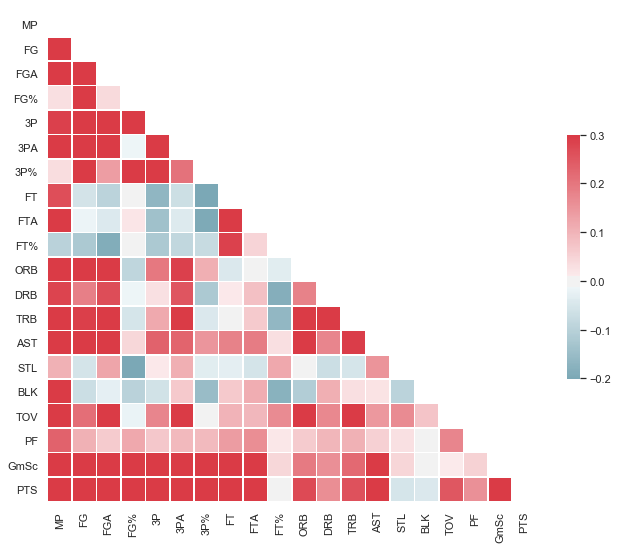

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [63]:
df3 = df2.copy(deep=True)
df3['PTS'] = df2.PTS.shift(-1)
df3 = df3.dropna()
df3.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,-1.394262,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,-0.841535,-1.386195,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-1.162305,0.873660
1,-0.212562,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,-0.841535,-0.438962,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.818212,-0.081542
2,0.969138,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,-0.066188,1.455505,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.104220,-0.354456
3,-2.575962,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,-0.841535,-0.438962,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,0.126388,-0.627371
4,0.378288,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,-0.841535,0.508272,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-1.691347,-0.763829


AxesSubplot(0.127273,0.125;0.617727x0.755)


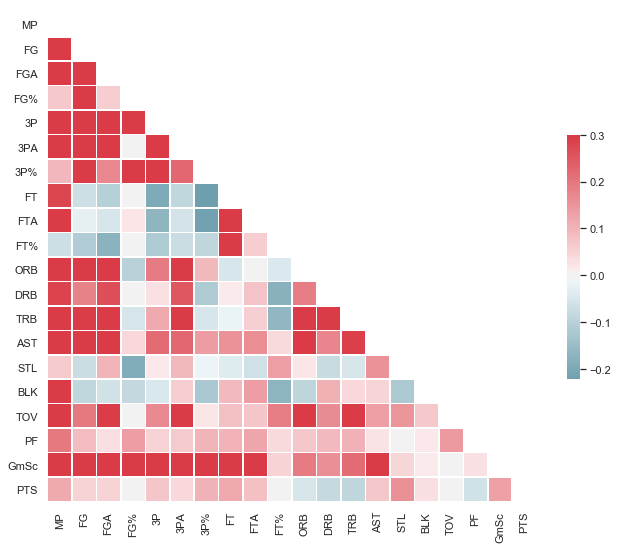

In [64]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

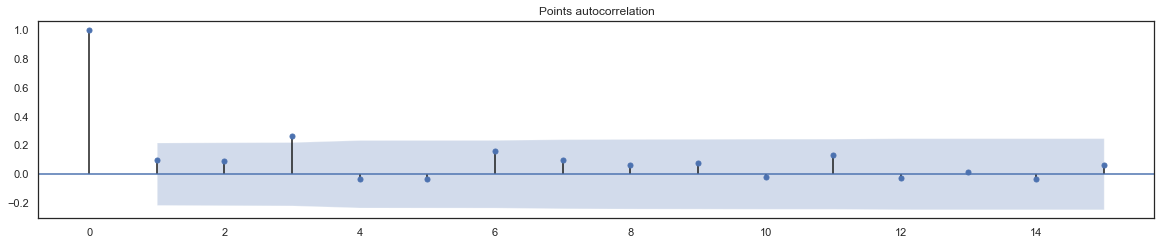

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.PTS, lags=15, ax=ax1, title= 'Points autocorrelation')

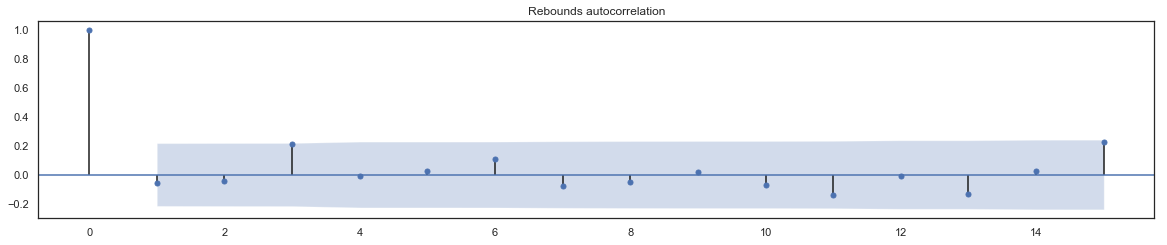

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.TRB, lags=15, ax=ax1, title='Rebounds autocorrelation')

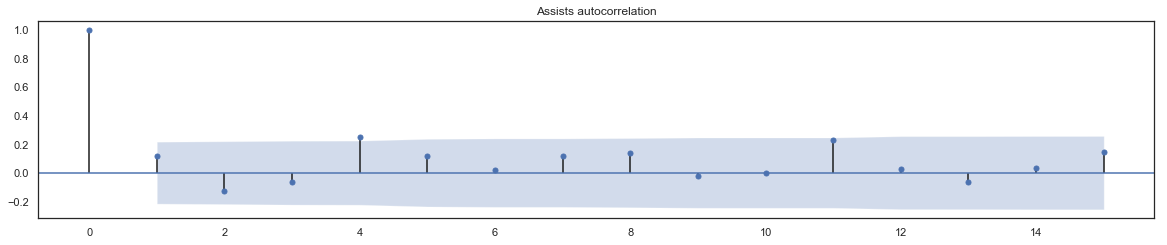

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.AST, lags=15, ax=ax1, title='Assists autocorrelation')

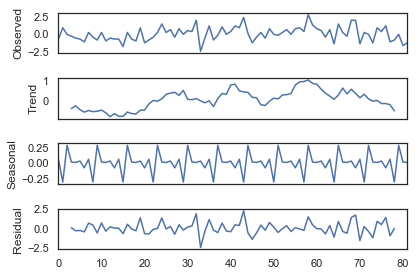

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df2.PTS, model='additive', freq=7)
result.plot()
plt.show()

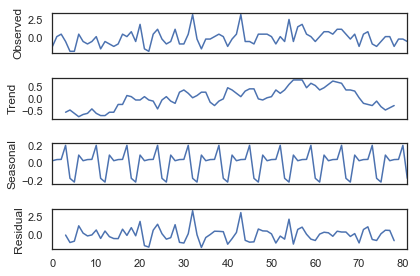

In [69]:
result = seasonal_decompose(df2.AST, model='additive', freq=7)
result.plot()
plt.show()

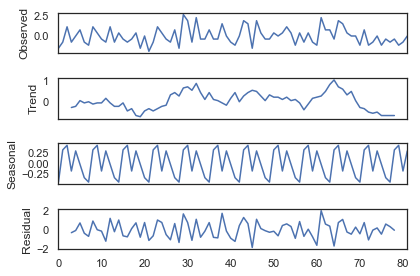

In [70]:
result = seasonal_decompose(df2.TRB, model='additive', freq=7)
result.plot()
plt.show()

In [71]:
df2['Date'] = df1['Date']
df2['Opp'] = df1['Opp']
df2['HC'] = df1['HC']
df2.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,AST,STL,BLK,TOV,PF,GmSc,PTS,Date,Opp,HC
0,-1.394262,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,...,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-1.162305,-0.763829,2018-10-18,MIA,Home
1,-0.212562,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.818212,0.873660,2018-10-20,TOR,Home
2,0.969138,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.104220,-0.081542,2018-10-22,POR,Away
3,-2.575962,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,0.126388,-0.354456,2018-10-24,GSW,Away
4,0.378288,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,-1.818196,0.412604,-0.820244,1.222943,1.526774,-1.691347,-0.627371,2018-10-26,SAC,Away


In [72]:
df2['Date'] = pd.to_datetime(df2['Date'])
#df2['Year'] = df2['Date'].dt.year
#df2['Month'] = df2['Date'].dt.month
#df2['Week'] = df2['Date'].dt.week
#df2['Yearday'] = df2['Date'].dt.dayofyear
df2['Rest'] = df2['Date'].dt.dayofyear.diff()%365
df2 = df2.dropna()

In [73]:
df2 = df2.drop(['Date'], axis=1)

In [167]:
df4 = df2.copy(deep=True)
df4['CurrOpp'] = df4.Opp.shift(-1)
df4['CurrHC'] = df4.HC.shift(-1)
#df4['Year'] = df4.Year.shift(-1)
#df4['Month'] = df4.Month.shift(-1)
#df4['Week'] = df4.Week.shift(-1)
#df4['Yearday'] = df4.Yearday.shift(-1)
df4['CurrRest'] = df4.Rest.shift(-1)

In [78]:
df4.to_csv('BradleyBealStatLog.csv')

In [168]:
standings = ['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK',
       'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
rankings = [27, 4, 23, 24, 20, 6, 28, 14, 19, 3, 1, 8, 18, 21, 29, 15, 16, 12, 9, 22, 10, 26, 5, 30, 7, 25, 13, 2, 11]
for x in range(29):
    df4 = df4.replace(standings[x],rankings[x])
df4.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV,PF,GmSc,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest
1,-0.212562,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,-0.933645,1.526774,0.818212,0.873660,2,Home,2.0,7.0,Away,2.0
2,0.969138,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,-1.472792,0.165954,-0.104220,-0.081542,7,Away,2.0,3.0,Away,2.0
3,-2.575962,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-1.472792,0.165954,0.126388,-0.354456,3,Away,2.0,25.0,Away,2.0
4,0.378288,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,1.222943,1.526774,-1.691347,-0.627371,25,Away,2.0,18.0,Away,2.0
5,-1.246549,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0.144649,0.165954,-1.203000,-0.763829,18,Away,2.0,29.0,Away,2.0


In [169]:
df4 = df4.replace('Home',1)
df4 = df4.replace('Away',0)
df4.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV,PF,GmSc,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest
1,-0.212562,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,-0.933645,1.526774,0.818212,0.873660,2,1,2.0,7.0,0.0,2.0
2,0.969138,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,-1.472792,0.165954,-0.104220,-0.081542,7,0,2.0,3.0,0.0,2.0
3,-2.575962,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-1.472792,0.165954,0.126388,-0.354456,3,0,2.0,25.0,0.0,2.0
4,0.378288,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,1.222943,1.526774,-1.691347,-0.627371,25,0,2.0,18.0,0.0,2.0
5,-1.246549,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0.144649,0.165954,-1.203000,-0.763829,18,0,2.0,29.0,0.0,2.0


In [170]:
df4['PredPts'] = df4.PTS.shift(-1)
df4['PredTrb'] = df4.TRB.shift(-1)
df4['PredAst'] = df4.AST.shift(-1)
df4 = df4.dropna()

In [171]:
df4 = df4.drop(['DRB', 'TRB','ORB','PF','TOV','FG%'], axis=1)
#df4 = df4.drop(['ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR','SAC', 'SAS', 'TOR', 'UTA', 'Year','Month', 'Week', 'Yearday'], axis=1)
#df4 = df4.drop(['G', 'FG%','3PA','FTA','ORB','DRB'], axis=1)
df4['Opp'] = df4['Opp']/30
df4['Rest'] = df4['Rest']/10
df4['CurrOpp'] = df4['CurrOpp']/30
df4['CurrRest'] = df4['CurrRest']/10
df4.head()

,MP,FG,FGA,3P,3PA,3P%,FT,FTA,FT%,AST,...,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest,PredPts,PredTrb,PredAst
1,-0.212562,0.903066,0.286036,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,0.178573,...,0.873660,0.066667,1,0.2,0.233333,0.0,0.2,-0.081542,1.120545,0.511368
2,0.969138,0.229871,1.116298,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,0.511368,...,-0.081542,0.233333,0,0.2,0.100000,0.0,0.2,-0.354456,-0.754653,-0.487017
3,-2.575962,0.229871,-0.959358,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,-0.487017,...,-0.354456,0.100000,0,0.2,0.833333,0.0,0.2,-0.627371,-0.004574,-1.818196
4,0.378288,-1.116518,-0.129096,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,-1.818196,...,-0.627371,0.833333,0,0.2,0.600000,0.0,0.2,-0.763829,0.745506,-1.818196
5,-1.246549,-0.443323,-0.751793,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,-1.818196,...,-0.763829,0.600000,0,0.2,0.966667,0.0,0.2,-1.173201,-0.754653,0.511368


In [172]:
#df4 = df4.sample(frac=1).reset_index(drop=True)
train=df4[0:(round(len(df4)*.8))] 
test=df4[(round(len(df4)*.8 - 1)):]
trains = np.split(train, [20], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [20], axis=1)
test_y=tests[1]
test_x=tests[0]

In [173]:
train_y.head()

,PredPts,PredTrb,PredAst
1,-0.081542,1.120545,0.511368
2,-0.354456,-0.754653,-0.487017
3,-0.627371,-0.004574,-1.818196
4,-0.763829,0.745506,-1.818196
5,-1.173201,-0.754653,0.511368


In [174]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## Predicting Points

### Linear Regression

In [175]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.PredPts.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([ 0.16642945, -0.51430593,  0.28716313, -0.10994382, -0.02287406,
        0.19254667,  0.0043141 , -0.09786366,  0.17090726, -0.27298882,
        0.1234118 , -0.0844371 ,  0.89526672, -0.43985796, -0.85973414,
       -0.24859838,  1.11900811,  0.15495177, -0.27534425,  2.27240463])

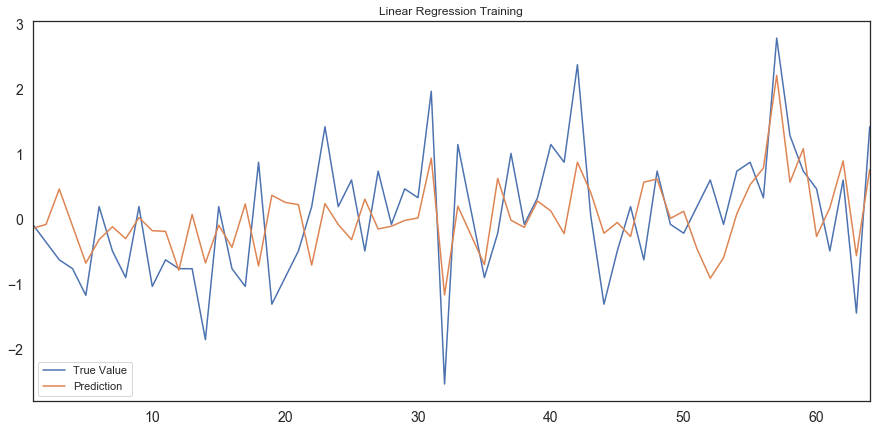

adj train r^2 = 0.005221338740472925
train mse = 0.6353155694442189


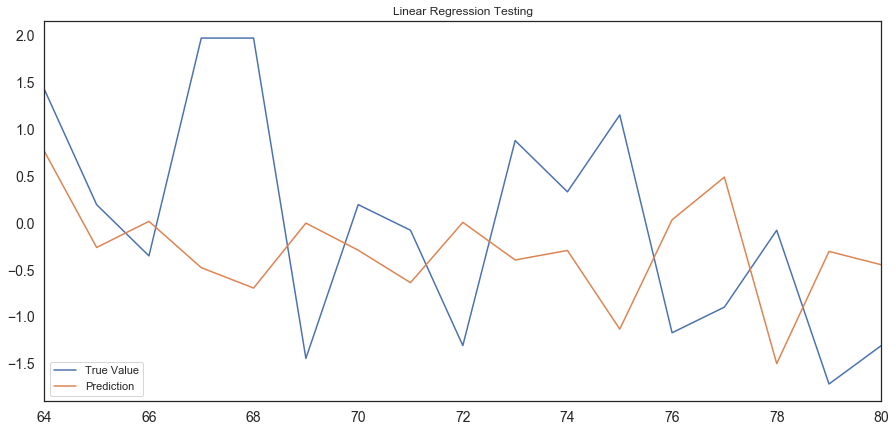

['MP', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -1.170397756664768
test mse = 1.9715468882234763


In [176]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### SARIMAX

In [140]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
auto_arima(df4['PredPts'],seasonal=True,m=11).summary()

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a d

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -105.792
Date:                Sat, 25 May 2019   AIC                            225.584
Time:                        14:40:17   BIC                            242.170
Sample:                             0   HQIC                           232.229
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0120      0.249      0.048      0.962      -0.476       0.500
ar.L1          0.0577      0.133      0.435      0.664      -0.203       0.318
ar.L2         -0.6471      0.148     -4.372      0.000      -0.937      -0.357
ar.L3          0.1858      0.129      1.441      0.150      -0.067       0.438
ma.L1         -0.0300      0.769     -0.039      0.969      -1.538       1.478
ma.L2          0.9999     52.004      0.019      0.985    -100.927     102.926
sigma2         0.8003     41.565      0.019      0.985     -80.665      82.265
===================================================================================
Ljung-Box (Q):                       32.86   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.78   Prob(JB):                         0.40
Heteroskedasticity (H):               1.87   Skew:                             0.32
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
exog = train[['MP', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL','BLK', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']].values
model = SARIMAX(train['PredPts'],exog=exog,order=(3,0,2),enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
results.summary()

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                PredPts   No. Observations:                   63
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 -61.250
Date:                Sat, 25 May 2019   AIC                            174.499
Time:                        14:40:22   BIC                            228.952
Sample:                             0   HQIC                           195.799
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3878      0.222      1.743      0.081      -0.048       0.824
x2            -0.6613      0.319     -2.072      0.038      -1.287      -0.036
x3            -0.0108      0.278     -0.039      0.969      -0.557       0.535
x4             0.0064      0.425      0.015      0.988      -0.827       0.840
x5             0.0534      0.306      0.174      0.862      -0.547       0.654
x6             0.1860      0.323      0.575      0.565      -0.448       0.820
x7             0.1399      0.835      0.167      0.867      -1.497       1.777
x8            -0.1548      0.934     -0.166      0.868      -1.985       1.675
x9            -0.0534      0.326     -0.164      0.870      -0.692       0.585
x10           -0.3003      0.132     -2.271      0.023      -0.559      -0.041
x11           -0.0769      0.112     -0.684      0.494      -0.297       0.144
x12            0.0823      0.195      0.421      0.674      -0.301       0.465
x13            0.8956      0.405      2.210      0.027       0.101       1.690
x14           -0.4775      0.391     -1.221      0.222      -1.244       0.289
x15            0.5504      0.428      1.286      0.198      -0.289       1.389
x16           -0.2039      0.255     -0.800      0.424      -0.703       0.296
x17            0.6692      0.911      0.735      0.462      -1.116       2.454
x18           -0.2070      0.344     -0.601      0.548      -0.882       0.468
x19           -0.1903      0.285     -0.668      0.504      -0.749       0.368
x20           -0.2438      0.998     -0.244      0.807      -2.200       1.712
ar.L1         -0.1415      0.320     -0.442      0.659      -0.769       0.486
ar.L2          0.0945      0.185      0.511      0.609      -0.268       0.457
ar.L3          0.4035      0.245      1.644      0.100      -0.077       0.885
ma.L1          0.2486     34.006      0.007      0.994     -66.401      66.898
ma.L2          0.9999    273.493      0.004      0.997    -535.036     537.036
sigma2         0.3978    108.777      0.004      0.997    -212.801     213.596
===================================================================================
Ljung-Box (Q):                       72.74   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.00   Prob(JB):                         0.58
Heteroskedasticity (H):               0.71   Skew:                             0.07
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.25e+20. Standard errors may be unstable.
"""

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


adj test r^2 = -0.7181450783628534
test mse = 83.81725000431317


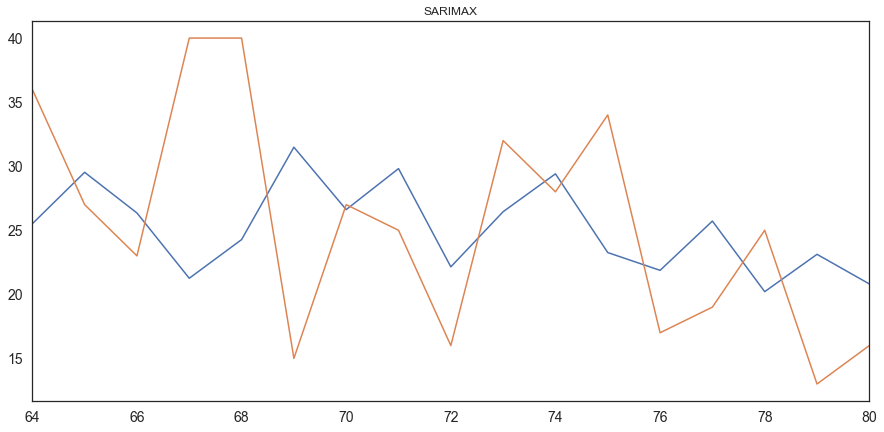

In [142]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['MP', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL','BLK', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX Predictions')

test_y2 = test_y.copy(deep=True)
test_y2['prediction']=sc2.inverse_transform(predictions.values)
test_y2['PredPts']=sc2.inverse_transform(test_y2['PredPts'])
test_y2['prediction'].plot(figsize=(15,7), title= 'SARIMAX', fontsize=14)
test_y2['PredPts'].plot(figsize=(15,7), title= 'SARIMAX', fontsize=14)
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Extra Trees

In [177]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.PredPts.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

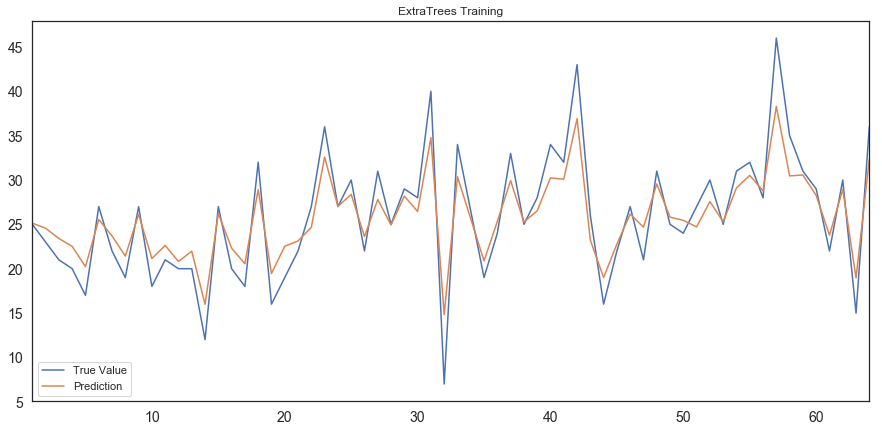

adj train r^2 = 0.7711979009763532
train mse = 0.14612450135107732


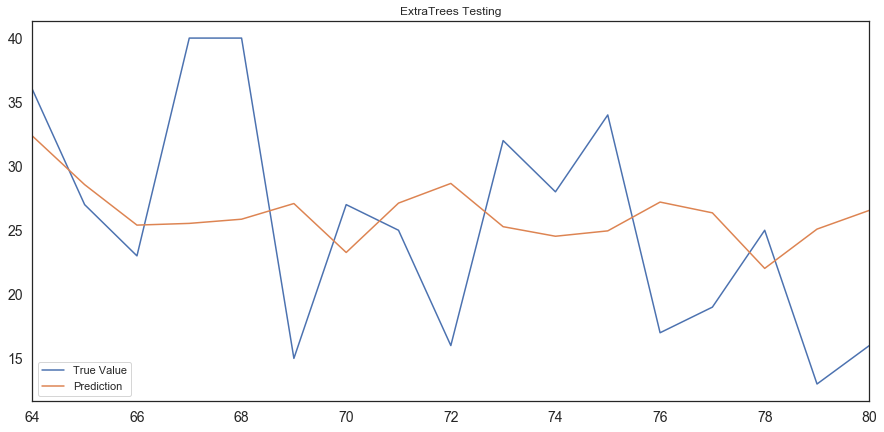

['MP', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.5902299205311963
test mse = 77.57709200000002


In [178]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Random Forrest

In [179]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PredPts.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

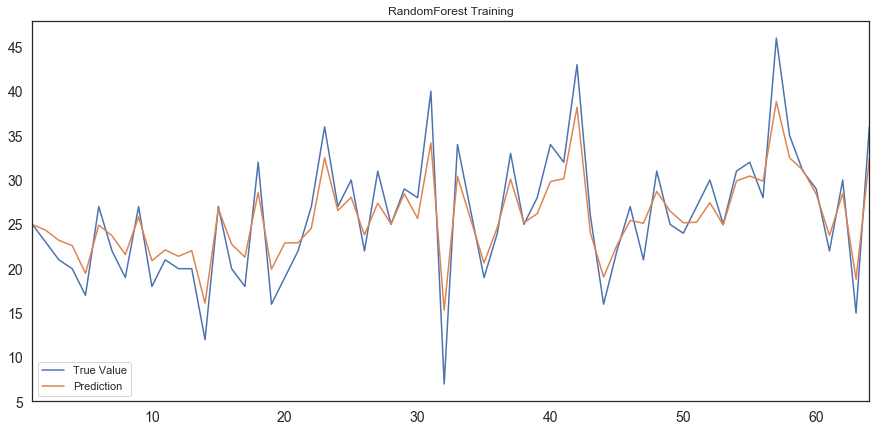

adj train r^2 = 0.7695480381583668
train mse = 0.14717818653405737


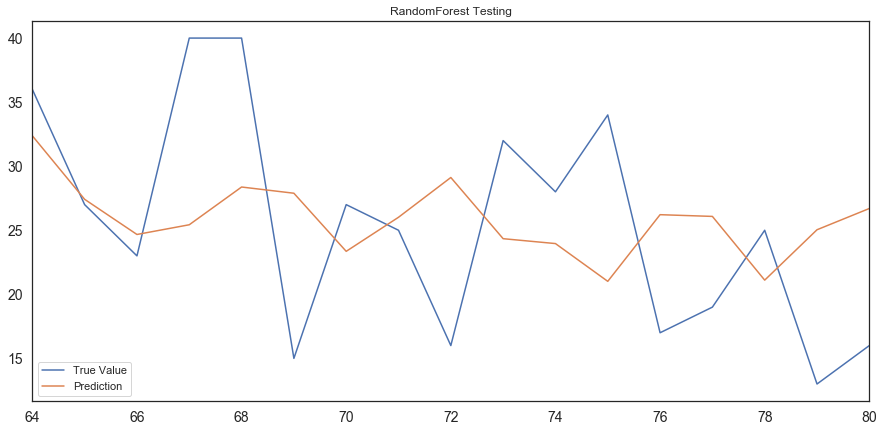

['MP', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.6512183415726278
test mse = 80.55232488235293


In [180]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### XGBoost

In [181]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.PredPts.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

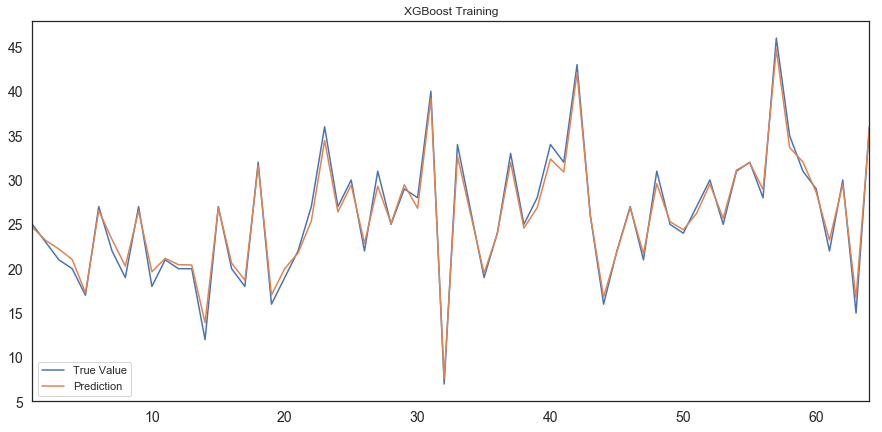

adj train r^2 = 0.975729738537155
train mse = 0.015500206812141088


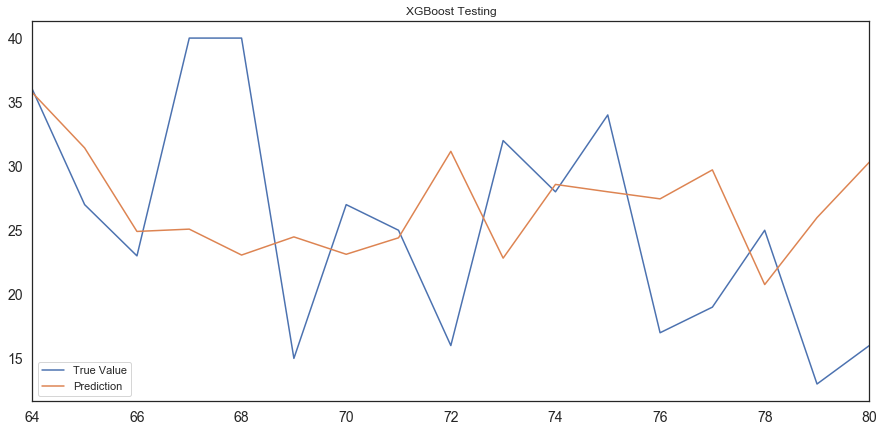

['MP', 'FG', 'FGA', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.9336564859638234
test mse = 94.33066575549289


In [182]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Feed Forward Neural Network

In [183]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [186]:
model = Sequential()
model.add(Dense(128, input_dim=20, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.PredPts.values.ravel(), validation_data=[test_x.values, test_y['PredPts'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Train on 63 samples, validate on 17 samples
Epoch 1/500
63/63 [==============================] - ETA: 1s - loss: 20.99 - 2s 24ms/step - loss: 20.7178 - val_loss: 21.0676
Epoch 2/500
63/63 [==============================] - ETA: 0s - loss: 20.43 - 0s 269us/step - loss: 20.1937 - val_loss: 20.5114
Epoch 3/500
63/63 [==============================] - ETA: 0s - loss: 19.92 - 0s 237us/step - loss: 19.6786 - val_loss: 19.9583
Epoch 4/500
63/63 [==============================] - ETA: 0s - loss: 19.38 - 0s 253us/step - loss: 19.1812 - val_loss: 19.4184
Epoch 5/500
63/63 [==============================] - ETA: 0s - loss: 18.68 - 0s 222us/step - loss: 18.5667 - val_loss: 18.8901
Epoch 6/500
63/63 [==============================] - ETA: 0s - loss: 18.16 - 0s 253us/step - loss: 18.0172 - val_loss: 18.3740
Epoch 7/500
63/63 [==============================] - ETA: 0s - loss: 17.63 - 0s 206us/step - loss: 17.5450 - val_loss: 17.8682
Epoch 8/500
63/63 [==============================] - ETA: 0s - loss:

63/63 [==============================] - ETA: 0s - loss: 3.128 - 0s 222us/step - loss: 3.0618 - val_loss: 3.9609
Epoch 66/500
63/63 [==============================] - ETA: 0s - loss: 3.005 - 0s 222us/step - loss: 2.9673 - val_loss: 3.8843
Epoch 67/500
63/63 [==============================] - ETA: 0s - loss: 2.942 - 0s 285us/step - loss: 2.8956 - val_loss: 3.8108
Epoch 68/500
63/63 [==============================] - ETA: 0s - loss: 2.877 - 0s 206us/step - loss: 2.8189 - val_loss: 3.7418
Epoch 69/500
63/63 [==============================] - ETA: 0s - loss: 2.805 - 0s 206us/step - loss: 2.7476 - val_loss: 3.6764
Epoch 70/500
63/63 [==============================] - ETA: 0s - loss: 2.714 - 0s 174us/step - loss: 2.6671 - val_loss: 3.6134
Epoch 71/500
63/63 [==============================] - ETA: 0s - loss: 2.662 - 0s 142us/step - loss: 2.6131 - val_loss: 3.5527
Epoch 72/500
63/63 [==============================] - ETA: 0s - loss: 2.614 - 0s 190us/step - loss: 2.5378 - val_loss: 3.4938
Epoch

Epoch 130/500
63/63 [==============================] - ETA: 0s - loss: 1.154 - 0s 158us/step - loss: 1.0788 - val_loss: 2.1941
Epoch 131/500
63/63 [==============================] - ETA: 0s - loss: 1.150 - 0s 158us/step - loss: 1.0949 - val_loss: 2.1951
Epoch 132/500
63/63 [==============================] - ETA: 0s - loss: 1.133 - 0s 142us/step - loss: 1.0789 - val_loss: 2.1983
Epoch 133/500
63/63 [==============================] - ETA: 0s - loss: 1.120 - 0s 174us/step - loss: 1.0630 - val_loss: 2.2003
Epoch 134/500
63/63 [==============================] - ETA: 0s - loss: 1.101 - 0s 158us/step - loss: 1.0459 - val_loss: 2.1989
Epoch 135/500
63/63 [==============================] - ETA: 0s - loss: 1.121 - 0s 158us/step - loss: 1.0678 - val_loss: 2.1930
Epoch 136/500
63/63 [==============================] - ETA: 0s - loss: 1.113 - 0s 174us/step - loss: 1.0560 - val_loss: 2.1838
Epoch 137/500
63/63 [==============================] - ETA: 0s - loss: 1.095 - 0s 158us/step - loss: 1.0482 - v

63/63 [==============================] - ETA: 0s - loss: 0.936 - 0s 174us/step - loss: 0.8805 - val_loss: 2.1180
Epoch 195/500
63/63 [==============================] - ETA: 0s - loss: 0.949 - 0s 174us/step - loss: 0.8970 - val_loss: 2.1174
Epoch 196/500
63/63 [==============================] - ETA: 0s - loss: 0.940 - 0s 142us/step - loss: 0.8840 - val_loss: 2.1233
Epoch 197/500
63/63 [==============================] - ETA: 0s - loss: 0.928 - 0s 142us/step - loss: 0.8905 - val_loss: 2.1348
Epoch 198/500
63/63 [==============================] - ETA: 0s - loss: 0.936 - 0s 190us/step - loss: 0.8819 - val_loss: 2.1487
Epoch 199/500
63/63 [==============================] - ETA: 0s - loss: 0.944 - 0s 142us/step - loss: 0.8785 - val_loss: 2.1565
Epoch 200/500
63/63 [==============================] - ETA: 0s - loss: 0.950 - 0s 142us/step - loss: 0.8863 - val_loss: 2.1607
Epoch 201/500
63/63 [==============================] - ETA: 0s - loss: 0.950 - 0s 190us/step - loss: 0.8940 - val_loss: 2.158

Epoch 259/500
63/63 [==============================] - ETA: 0s - loss: 0.859 - 0s 174us/step - loss: 0.8138 - val_loss: 2.1836
Epoch 260/500
63/63 [==============================] - ETA: 0s - loss: 0.897 - 0s 158us/step - loss: 0.8356 - val_loss: 2.1966
Epoch 261/500
63/63 [==============================] - ETA: 0s - loss: 0.900 - 0s 142us/step - loss: 0.8338 - val_loss: 2.2064
Epoch 262/500
63/63 [==============================] - ETA: 0s - loss: 0.870 - 0s 142us/step - loss: 0.8327 - val_loss: 2.2145
Epoch 263/500
63/63 [==============================] - ETA: 0s - loss: 0.872 - 0s 158us/step - loss: 0.8134 - val_loss: 2.2179
Epoch 264/500
63/63 [==============================] - ETA: 0s - loss: 0.859 - 0s 158us/step - loss: 0.8236 - val_loss: 2.2125
Epoch 265/500
63/63 [==============================] - ETA: 0s - loss: 0.878 - 0s 142us/step - loss: 0.8386 - val_loss: 2.2003
Epoch 266/500
63/63 [==============================] - ETA: 0s - loss: 0.875 - 0s 158us/step - loss: 0.8106 - v

63/63 [==============================] - ETA: 0s - loss: 0.810 - 0s 142us/step - loss: 0.7727 - val_loss: 2.1962
Epoch 324/500
63/63 [==============================] - ETA: 0s - loss: 0.833 - 0s 174us/step - loss: 0.7982 - val_loss: 2.2236
Epoch 325/500
63/63 [==============================] - ETA: 0s - loss: 0.826 - 0s 127us/step - loss: 0.7797 - val_loss: 2.2302
Epoch 326/500
63/63 [==============================] - ETA: 0s - loss: 0.830 - 0s 158us/step - loss: 0.7970 - val_loss: 2.2101
Epoch 327/500
63/63 [==============================] - ETA: 0s - loss: 0.838 - 0s 158us/step - loss: 0.7924 - val_loss: 2.1868
Epoch 328/500
63/63 [==============================] - ETA: 0s - loss: 0.805 - 0s 142us/step - loss: 0.7867 - val_loss: 2.1749
Epoch 329/500
63/63 [==============================] - ETA: 0s - loss: 0.809 - 0s 190us/step - loss: 0.7820 - val_loss: 2.1738
Epoch 330/500
63/63 [==============================] - ETA: 0s - loss: 0.807 - 0s 158us/step - loss: 0.7711 - val_loss: 2.189

Epoch 388/500
63/63 [==============================] - ETA: 0s - loss: 0.786 - 0s 190us/step - loss: 0.7783 - val_loss: 2.1757
Epoch 389/500
63/63 [==============================] - ETA: 0s - loss: 0.771 - 0s 174us/step - loss: 0.7650 - val_loss: 2.1930
Epoch 390/500
63/63 [==============================] - ETA: 0s - loss: 0.791 - 0s 190us/step - loss: 0.7780 - val_loss: 2.2161
Epoch 391/500
63/63 [==============================] - ETA: 0s - loss: 0.782 - 0s 190us/step - loss: 0.7440 - val_loss: 2.2364
Epoch 392/500
63/63 [==============================] - ETA: 0s - loss: 0.784 - 0s 190us/step - loss: 0.7502 - val_loss: 2.2395
Epoch 393/500
63/63 [==============================] - ETA: 0s - loss: 0.790 - 0s 190us/step - loss: 0.7811 - val_loss: 2.2277
Epoch 394/500
63/63 [==============================] - ETA: 0s - loss: 0.768 - 0s 190us/step - loss: 0.7440 - val_loss: 2.2049
Epoch 395/500
63/63 [==============================] - ETA: 0s - loss: 0.798 - 0s 174us/step - loss: 0.7662 - v

63/63 [==============================] - ETA: 0s - loss: 0.762 - 0s 158us/step - loss: 0.7530 - val_loss: 2.2586
Epoch 453/500
63/63 [==============================] - ETA: 0s - loss: 0.755 - 0s 158us/step - loss: 0.7179 - val_loss: 2.2752
Epoch 454/500
63/63 [==============================] - ETA: 0s - loss: 0.764 - 0s 142us/step - loss: 0.7465 - val_loss: 2.2475
Epoch 455/500
63/63 [==============================] - ETA: 0s - loss: 0.745 - 0s 190us/step - loss: 0.7201 - val_loss: 2.1953
Epoch 456/500
63/63 [==============================] - ETA: 0s - loss: 0.761 - 0s 158us/step - loss: 0.7295 - val_loss: 2.1552
Epoch 457/500
63/63 [==============================] - ETA: 0s - loss: 0.739 - 0s 174us/step - loss: 0.7424 - val_loss: 2.1434
Epoch 458/500
63/63 [==============================] - ETA: 0s - loss: 0.763 - 0s 158us/step - loss: 0.7248 - val_loss: 2.1573
Epoch 459/500
63/63 [==============================] - ETA: 0s - loss: 0.756 - 0s 206us/step - loss: 0.7267 - val_loss: 2.173

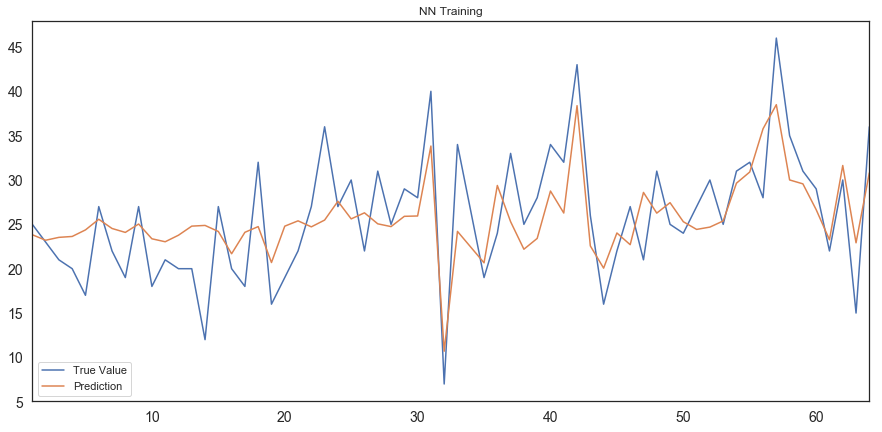

adj train r^2 = 0.31055877656789066
train mse = 0.44031176031510855


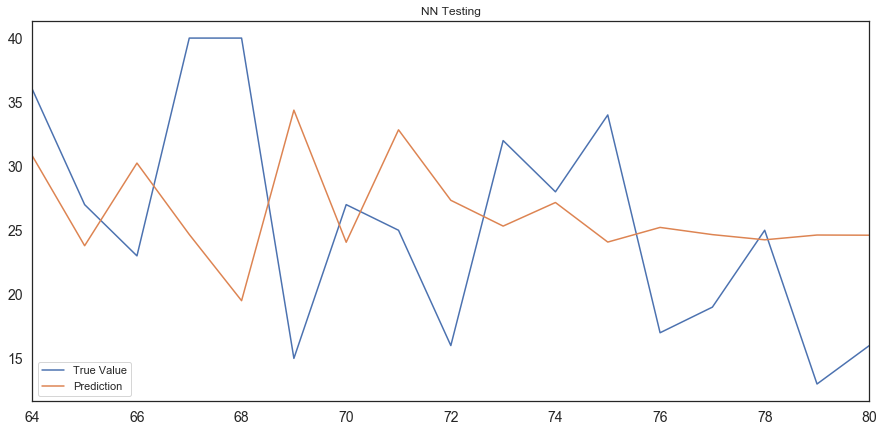

adj test r^2 = -1.1368792307012199
test mse = 104.24459666664018


In [187]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### LSTM

In [188]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [193]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform',recurrent_regularizer=regularizers.l2(0.43),recurrent_dropout=.43,return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu',return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PredPts.values.ravel(), validation_data=[X_tst_t, test_y['PredPts'].values.ravel()], epochs=100, verbose=1, shuffle=False)

Train on 63 samples, validate on 17 samples
Epoch 1/100
63/63 [==============================] - ETA: 7s - loss: 258.897 - 9s 147ms/step - loss: 249.3302 - val_loss: 223.9901
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 223.539 - 1s 9ms/step - loss: 215.8245 - val_loss: 192.9282
Epoch 3/100
63/63 [==============================] - ETA: 0s - loss: 192.473 - 1s 8ms/step - loss: 185.3545 - val_loss: 164.5886
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 164.126 - 1s 9ms/step - loss: 157.8162 - val_loss: 139.5840
Epoch 5/100
63/63 [==============================] - ETA: 0s - loss: 139.111 - 1s 8ms/step - loss: 133.6261 - val_loss: 117.8949
Epoch 6/100
63/63 [==============================] - ETA: 0s - loss: 117.402 - 0s 8ms/step - loss: 112.6937 - val_loss: 99.2888
Epoch 7/100
63/63 [==============================] - ETA: 0s - loss: 98.76 - 0s 8ms/step - loss: 94.7524 - val_loss: 83.4642
Epoch 8/100
63/63 [==============================] - ETA

63/63 [==============================] - ETA: 0s - loss: 0.116 - 1s 8ms/step - loss: 0.0909 - val_loss: 1.7713
Epoch 67/100
63/63 [==============================] - ETA: 0s - loss: 0.050 - 1s 8ms/step - loss: 0.0556 - val_loss: 1.8036
Epoch 68/100
63/63 [==============================] - ETA: 0s - loss: 0.061 - 1s 8ms/step - loss: 0.0636 - val_loss: 1.8891
Epoch 69/100
63/63 [==============================] - ETA: 0s - loss: 0.043 - 0s 7ms/step - loss: 0.0464 - val_loss: 1.9827
Epoch 70/100
63/63 [==============================] - ETA: 0s - loss: 0.107 - 0s 7ms/step - loss: 0.0970 - val_loss: 1.9897
Epoch 71/100
63/63 [==============================] - ETA: 0s - loss: 0.053 - 0s 7ms/step - loss: 0.0567 - val_loss: 1.9925
Epoch 72/100
63/63 [==============================] - ETA: 0s - loss: 0.050 - 0s 7ms/step - loss: 0.0522 - val_loss: 1.9999
Epoch 73/100
63/63 [==============================] - ETA: 0s - loss: 0.030 - 0s 8ms/step - loss: 0.0310 - val_loss: 1.9654
Epoch 74/100
63/63 [=

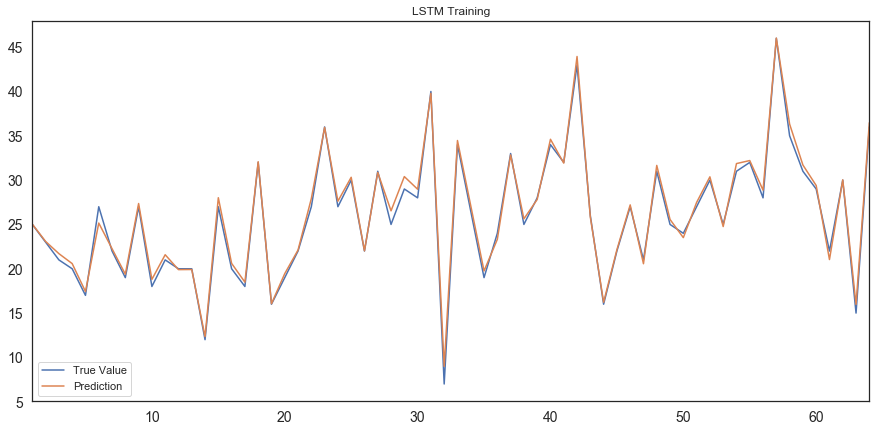

adj train r^2 = 0.9864991019031488
train mse = 0.0086223509776027


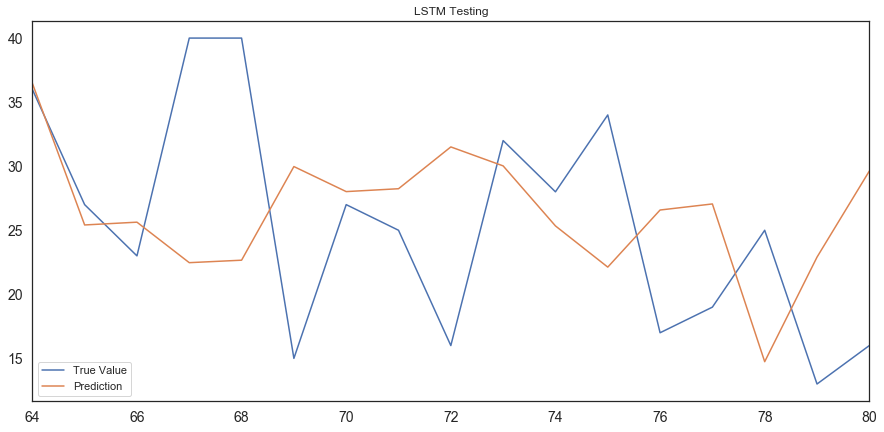

adj test r^2 = -1.1597685460281553
test mse = 105.36121917386951


In [194]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model_lstm.predict(X_tr_t))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### TPOT

In [165]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=30, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PredPts.values.ravel())


30.00811356666667 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: KNeighborsRegressor(ElasticNetCV(ZeroCount(ZeroCount(ZeroCount(RobustScaler(Normalizer(ZeroCount(Normalizer(SelectPercentile(ElasticNetCV(MinMaxScaler(StandardScaler(MinMaxScaler(Normalizer(MaxAbsScaler(StandardScaler(StandardScaler(MaxAbsScaler(RBFSampler(SelectPercentile(Nystroem(SelectPercentile(Nystroem(PCA(PCA(DecisionTreeRegressor(DecisionTreeRegressor(input_matrix, max_depth=5, min_samples_leaf=10, min_samples_split=11), max_depth=5, min_samples_leaf=14, min_samples_split=7), iterated_power=2, svd_solver=randomized), iterated_power=10, svd_solver=randomized), gamma=0.5, kernel=sigmoid, n_components=3), percentile=40), gamma=0.5, kernel=sigmoid, n_components=3), percentile=4), gamma=0.1))))), norm=l2)))), l1_ratio=0.1, tol=0.01), percentile=4), norm=l2)), norm=l1))))), l1_ratio=0.8500000000000

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=30, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

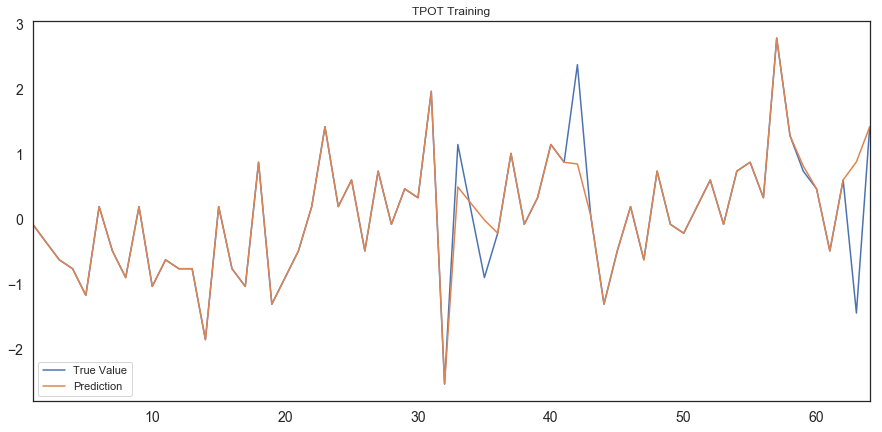

adj train r^2 = 0.7773236485171482
train mse = 0.14221229159154744


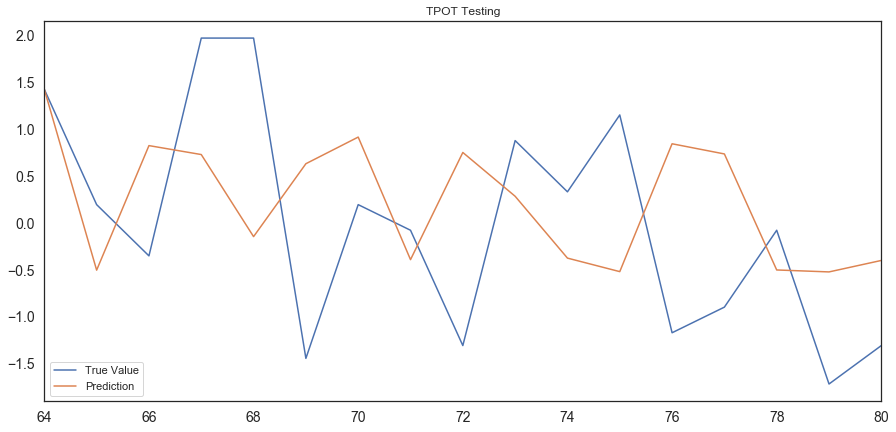

adj test r^2 = -0.9293787393628576
test mse = 1.7526099251230043


In [166]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, train_y2.prediction)))
test_y['PredPts'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))